In [1]:
#
# labels[0] => Week #
# labels[1] => Day of Week
# labels[2] => Backup Start Time - Hour of Day
# labels[3] => Work-Flow-ID
# labels[4] => File Name
# labels[5] => Size of Backup (GB)
# labels[6] => Backup Time (hour)
# 
%matplotlib inline
import numpy as np
import pandas as pd

Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]

def OneDimensionTransfer(label, data):
    if label == labels[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif label == labels[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif label == labels[4]:
        for i,j in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data
    
# for i in range(len(labels)):    
#     Data = OneDimensionTransfer(labels[i], Data)
    
# newData = Data

def OneHotEncoding(label, data):
    tmpData = pd.get_dummies(data,columns=[str(label)])
    return tmpData

# newData = OneHotEncoding(labels[1], newData)
# print newData

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


In [5]:
#RMSE for all scalar

import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns

uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]

def OneDimensionTransfer(label, data):
    if label == labels[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif label == labels[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif label == labels[4]:
        for i,j in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data
    
for i in range(len(labels)):    
    Data = OneDimensionTransfer(labels[i], Data)
    
Training = Data.copy()
Training.drop(labels[6],1,inplace = True)
Sample = Training.copy()
Target = Training.pop(labels[5])

Lin_reg = LinearRegression()
Lin_reg.fit(Training,Target)

def CalculateRMSE(data,predict):
    return sp.sqrt(sp.mean((predict - data) ** 2))
def FoldRMSE(data):
    target = data.pop('Size of Backup (GB)')
    predict = Lin_reg.predict(data)
    return CalculateRMSE(predict,target)


def FoldMSE(data,lin_reg):
    target = data.pop('Size of Backup (GB)')
    predict = lin_reg.predict(data)
    return mean_squared_error(target,predict)

In [6]:
def PlotCompare(training_data):
    Predict = cross_val_predict(Lin_reg, training_data, Target, cv = 10)


    fig, ax = plt.subplots()
    ax.scatter(Target, Predict)
    ax.plot([Target.min(), Target.max()], [Target.min(), Target.max()], 'k--', lw = 4)
    ax.set_xlabel('Measured size', fontsize = 20)
    ax.set_ylabel('Predicted size', fontsize = 20)
    plt.title('Fitted values vs. Actual values', fontsize = 20)
    print "Fitted values vs. Actual values:"
    plt.show()



    fig, ax = plt.subplots()
    ax.scatter(Predict, Predict-Target)
    ax.set_xlabel('Predicted size', fontsize = 20)
    ax.set_ylabel('Residual', fontsize = 20)
    plt.title('Residuals vs. Fitted value', fontsize = 20)
    print "Residuals vs. Fitted value"
    plt.show()

train_RMSE 0.10324891604212896
test_RMSE 0.10660911216394796
train_RMSE 0.1039714229965297
test_RMSE 0.10009096185864506
train_RMSE 0.10322987525110836
test_RMSE 0.1067749139185214
train_RMSE 0.10395054345712688
test_RMSE 0.10028593026550958
train_RMSE 0.10319916799444374
test_RMSE 0.10704169864673337
train_RMSE 0.1039428169975806
test_RMSE 0.10035797226858767
train_RMSE 0.10320664253144325
test_RMSE 0.1069768284170593
train_RMSE 0.10394104438447008
test_RMSE 0.10037449217973053
train_RMSE 0.1032057089557413
test_RMSE 0.10698693125111841
train_RMSE 0.10399596458247537
test_RMSE 0.09985898976602667
Fitted values vs. Actual values:


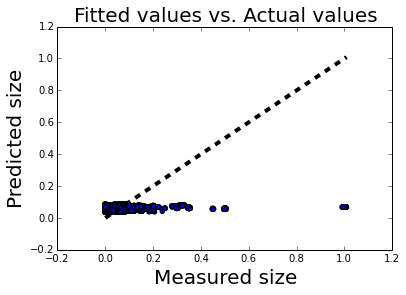

Residuals vs. Fitted value


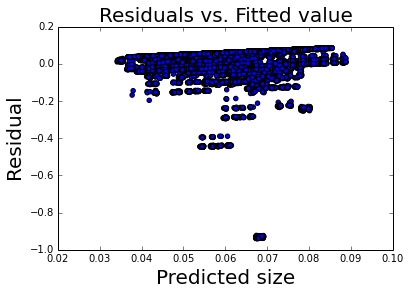

In [7]:
import matplotlib.pyplot as plt 
 
kf = KFold(n_splits=10)
kf.get_n_splits(Sample)

for train_index, test_index in kf.split(Sample):
    train_set = Sample.iloc[train_index, :]
    test_set = Sample.iloc[test_index, :]
    print 'train_RMSE', FoldRMSE(train_set)
    print 'test_RMSE', FoldRMSE(test_set)
  
PlotCompare(Training)

Fitted values vs. Actual values:


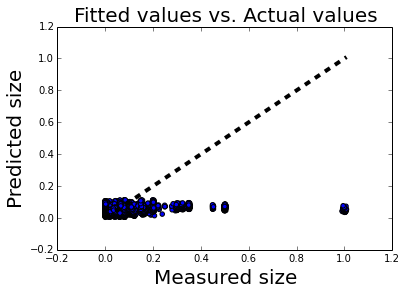

Residuals vs. Fitted value


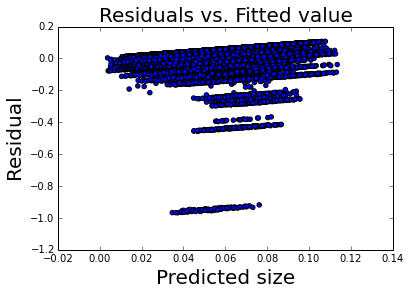

In [8]:
#standard
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy = False, with_mean=False, with_std=True)
scaler.fit(Training)
Standard_Training = scaler.transform(Training)
Lin_reg = LinearRegression(fit_intercept = False)
Lin_reg.fit(Standard_Training,Target)

PlotCompare(Standard_Training)

In [9]:
from sklearn.feature_selection import f_regression
import numpy as np
f_test,_ = f_regression(Training,Target) 
print f_test
f_test = np.array(f_test)
f_label = f_test.argsort()[-3:][::-1]
print f_label

[8.45006257e-03 3.88163798e+01 1.50740934e+02 2.61386654e+01
 2.53200943e+01]
[2 1 3]


Fitted values vs. Actual values:


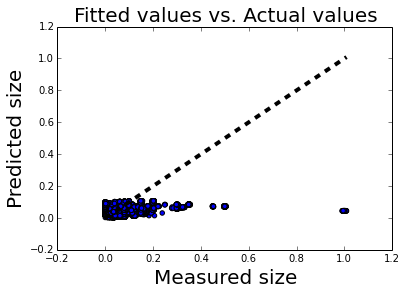

Residuals vs. Fitted value


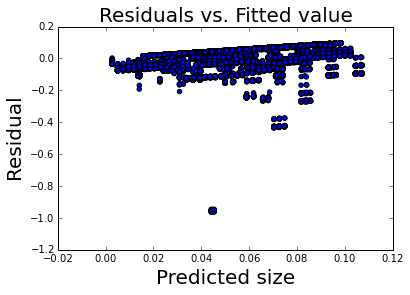

In [10]:
New_Training = Training.iloc[:,1:4]

Lin_reg = LinearRegression(fit_intercept = False)
Lin_reg.fit(New_Training,Target)

Predict = cross_val_predict(Lin_reg, New_Training, Target, cv = 10)

PlotCompare(New_Training)

In [11]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
f_test = mutual_info_regression(Training,Target) 
print f_test
f_test = np.array(f_test)
f_label = f_test.argsort()[-3:][::-1]
print f_label

/Users/shuobai/Library/Python/2.7/lib/python/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[0.00612764 0.13453887 0.23488811 0.2711108  0.43519947]
[4 3 2]


Fitted values vs. Actual values:


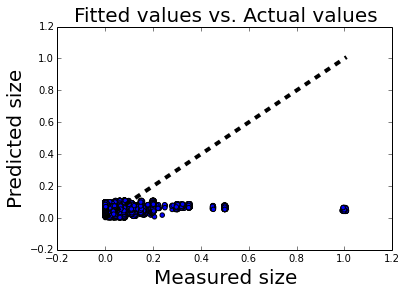

Residuals vs. Fitted value


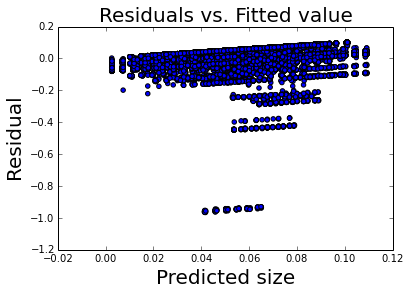

In [12]:
New_Training = Training.iloc[:,2:5]

Lin_reg = LinearRegression(fit_intercept = False)
Lin_reg.fit(New_Training,Target)

Predict = cross_val_predict(Lin_reg, New_Training, Target, cv = 10)

PlotCompare(New_Training)

In [16]:
import itertools

Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]

def OneDimensionTransfer(label, data):
    if label == labels[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif label == labels[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif label == labels[4]:
        for i,j in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data
    
def OneHotEncoding(label, data):
    tmpData = pd.get_dummies(data,columns=[str(label)])
    return tmpData

def MakeCombinationData(data):
    lsts = list(itertools.product([0, 1], repeat=5))
    data_set = []
    for lst in lsts:
        tmp_data = data.copy()
        for index,item in enumerate(lst):
            if item == 0:
                tmp_data = OneDimensionTransfer(labels[index], tmp_data)
            else:
                tmp_data = OneHotEncoding(labels[index], tmp_data)
        data_set.append(tmp_data)
    return data_set,lsts

Data.drop(labels[6],1,inplace = True)
print type(Data)
Data_set, Lsts = MakeCombinationData(Data)


labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)
<class 'pandas.core.frame.DataFrame'>


In [33]:
import math
def CaculateTrainandTestRSME(data,shuffle,lin_reg):
    kf = KFold(n_splits=10,shuffle = shuffle)
    #kf.get_n_splits(data)
    train_MSE = 0
    test_MSE = 0
    for train_index, test_index in kf.split(data):
        train_set = data.iloc[train_index, :]
        test_set = data.iloc[test_index, :]
        
        train = train_set.copy()
        target = train.pop('Size of Backup (GB)')
        lin_reg_ = lin_reg
        lin_reg_.fit(train,target)
#         print 'train',train.shape
        train_MSE += FoldMSE(train_set,lin_reg_)
        test_MSE += FoldMSE(test_set,lin_reg_)
    return math.sqrt(train_MSE/10), math.sqrt(test_MSE/10)

Train_RMSE_set = []
Test_RMSE_set = []
for data in Data_set:
#     sample = data.copy()
#     target = data.pop('Size of Backup (GB)')
    lin_reg = LinearRegression()
#     lin_reg.fit(data,target)
    Train_RMSE, Test_RMSE = CaculateTrainandTestRSME(data, False, lin_reg)
    Train_RMSE_set.append(Train_RMSE)
    Test_RMSE_set.append(Test_RMSE)

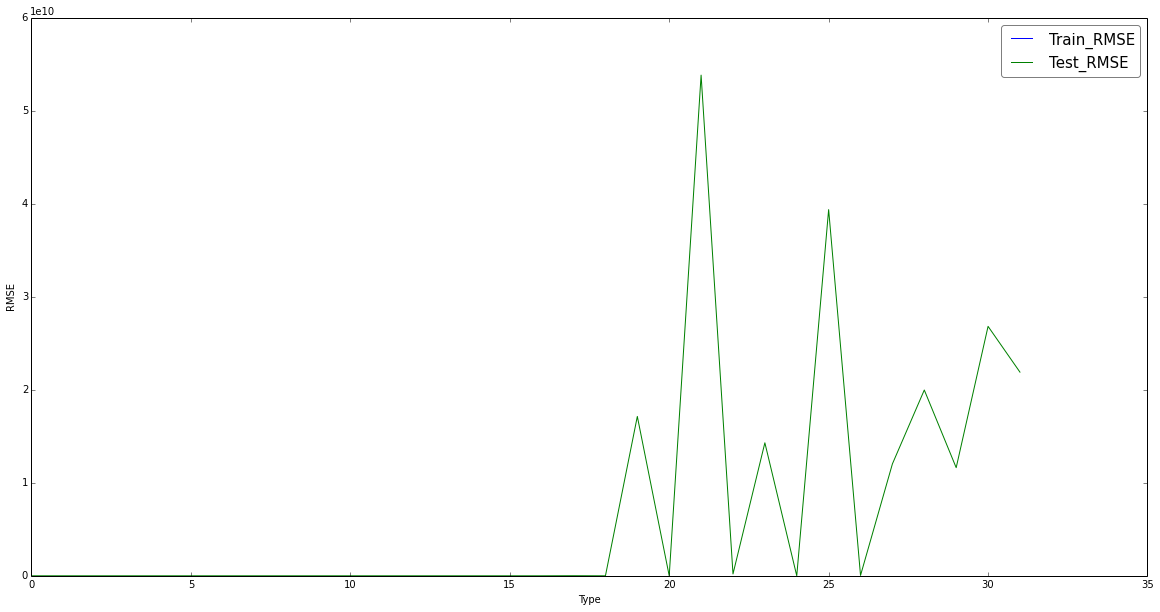

In [34]:
def Plot32Model(train_RMSE_set,test_RMSE_set):
    plt.figure(figsize = (20,10))
    plt.plot(range(32), train_RMSE_set, label = "Train_RMSE", linewidth = 1)
    plt.plot(range(32), test_RMSE_set, label = "Test_RMSE", linewidth = 1)
    plt.xlabel('Type')
    plt.ylabel('RMSE')
    plt.legend(loc = 1, fancybox = True, framealpha = 0.5, prop = {'size': 15})
    plt.show()

#     for i in range(len(Lsts)):
#         print 'Type',str(i),Lsts[i]
        
Plot32Model(Train_RMSE_set,Test_RMSE_set)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


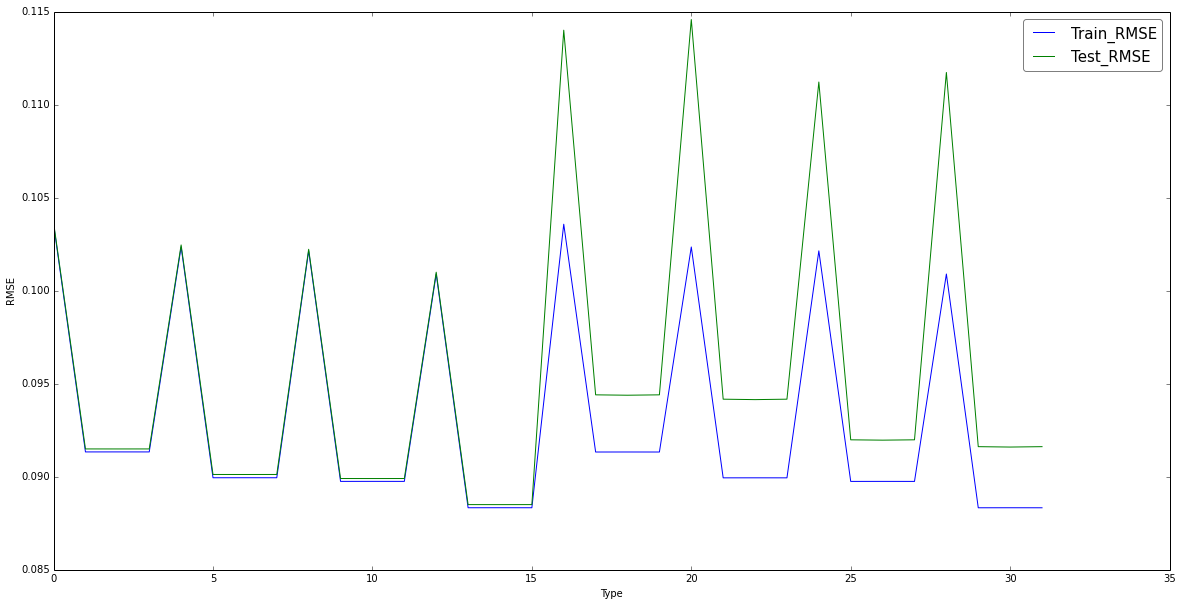

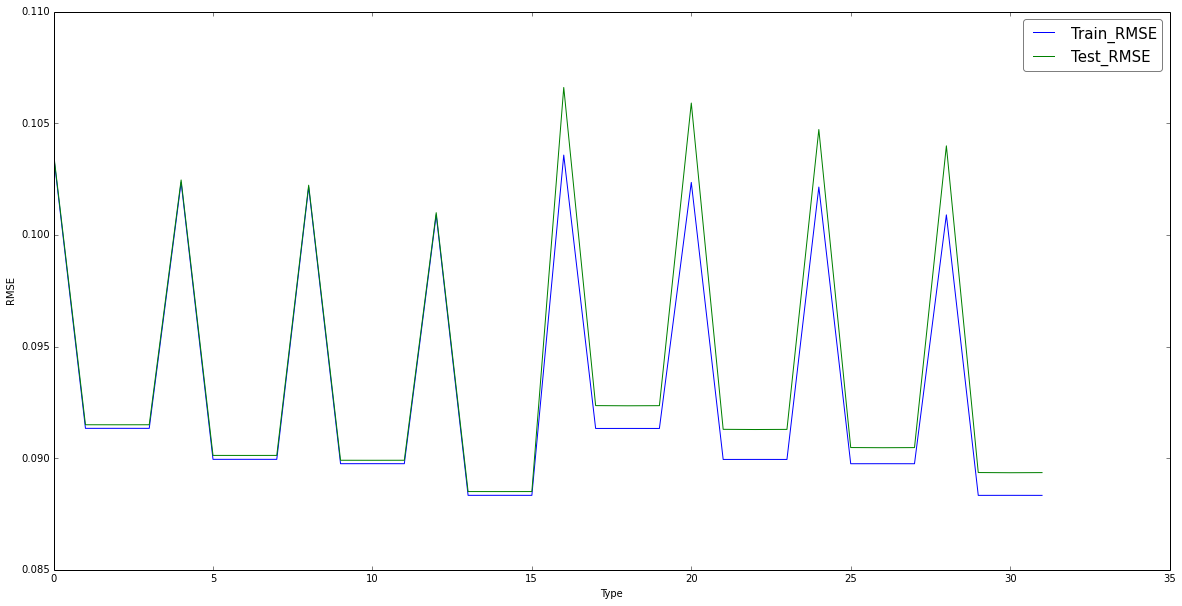

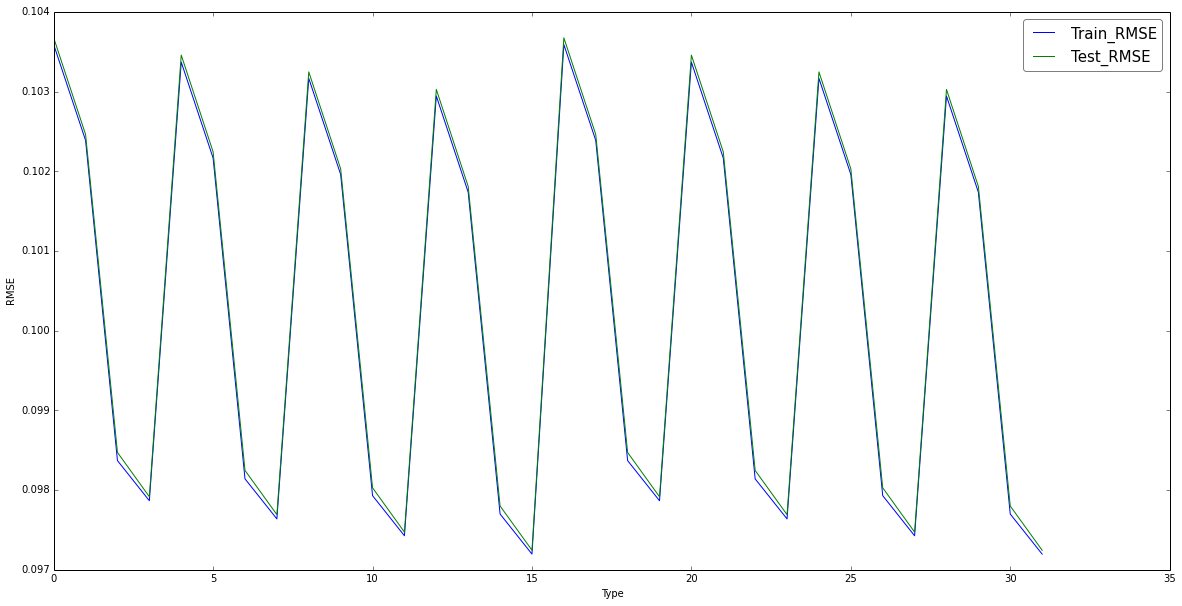

In [32]:
from sklearn.linear_model import Ridge
Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]
Data.drop(labels[6],1,inplace = True)
Data_set, Lsts = MakeCombinationData(Data)

def copy(data_set):
    tmp_data_set = []
    for data in data_set:
        tmp_data = data.copy()
        tmp_data_set.append(tmp_data)
    return tmp_data_set


for alpha in 0.001,1,10000:
    tmp_Data_set = copy(Data_set)
    Train_RMSE_set = []
    Test_RMSE_set = []
    for data in tmp_Data_set:
        sample = data.copy()
        target = data.pop('Size of Backup (GB)')
        lin_reg = Ridge(alpha = alpha)
#        lin_reg.fit(data,target)
        Train_RMSE, Test_RMSE = CaculateTrainandTestRSME(sample,False,lin_reg)
        Train_RMSE_set.append(Train_RMSE)
        Test_RMSE_set.append(Test_RMSE)

    Plot32Model(Train_RMSE_set, Test_RMSE_set)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


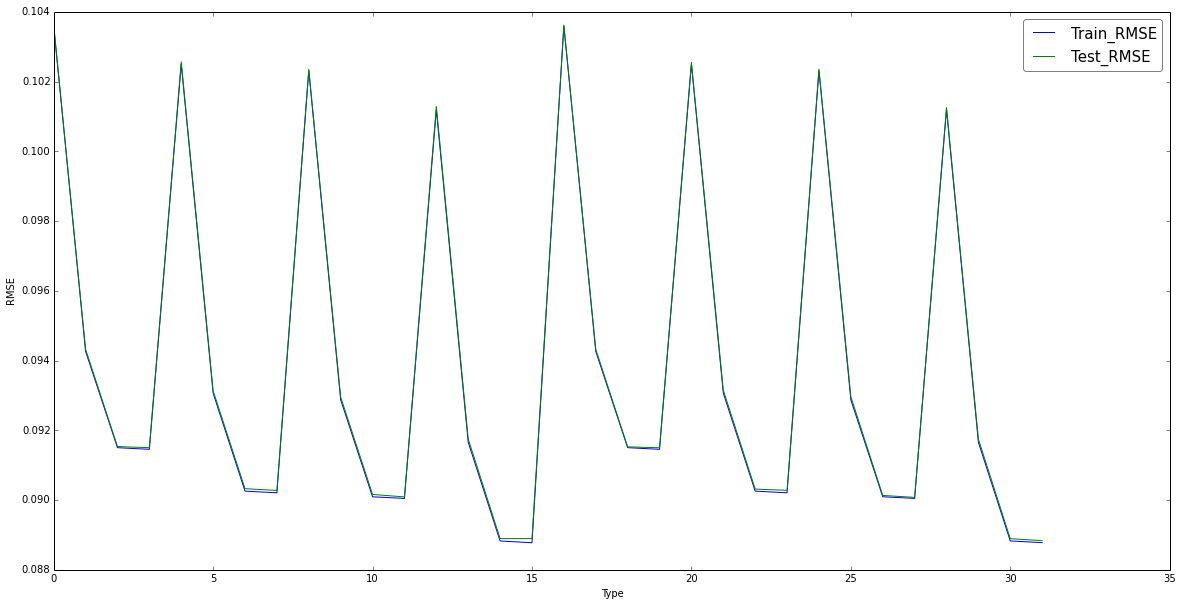

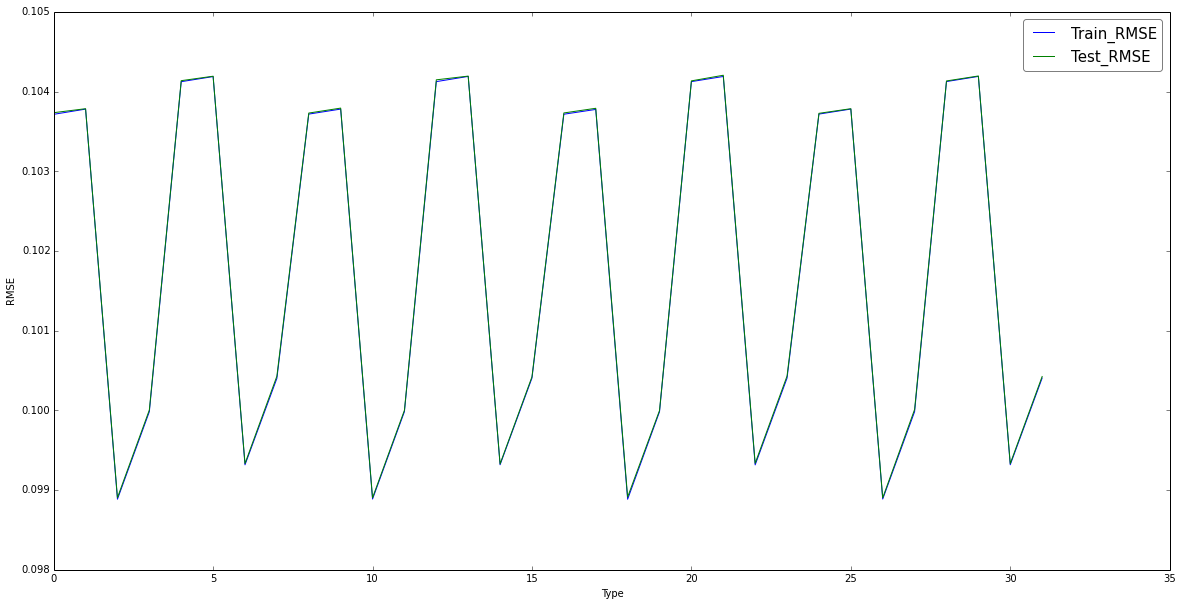

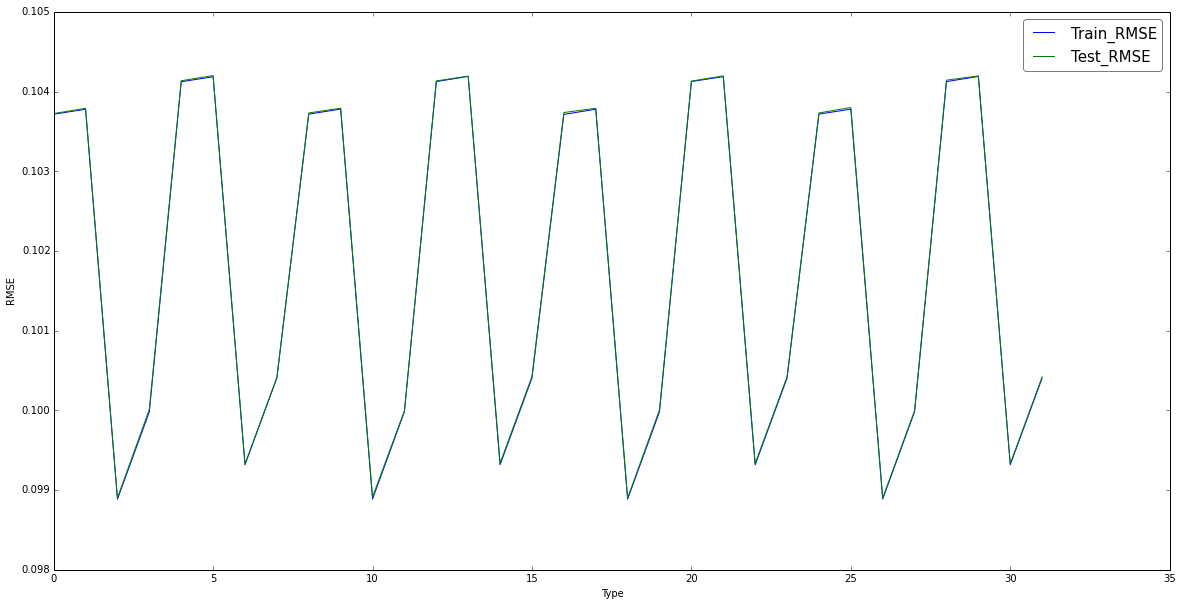

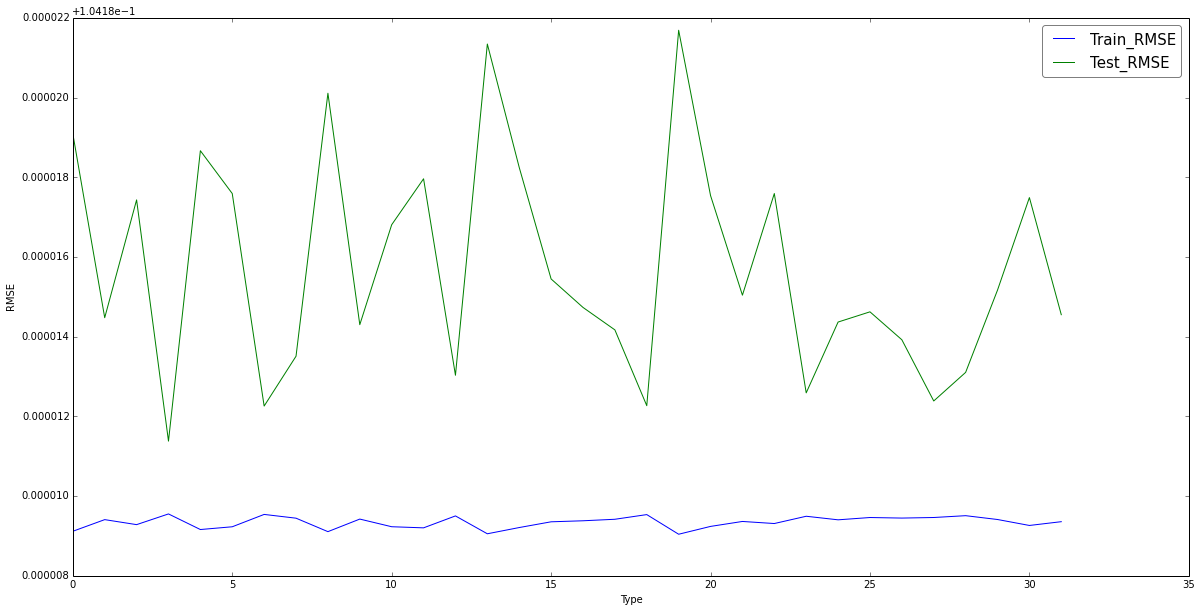

In [41]:
from sklearn.linear_model import Lasso
Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]
Data.drop(labels[6],1,inplace = True)
Data_set, Lsts = MakeCombinationData(Data)

def copy(data_set):
    tmp_data_set = []
    for data in data_set:
        tmp_data = data.copy()
        tmp_data_set.append(tmp_data)
    return tmp_data_set

for alpha in 0.001,0.01,0.01,0.1:
    tmp_Data_set = copy(Data_set)
    Train_RMSE_set = []
    Test_RMSE_set = []
    for data in tmp_Data_set:
        sample = data.copy()
        target = data.pop('Size of Backup (GB)')
        lin_reg = Lasso(alpha=alpha)
        Train_RMSE, Test_RMSE = CaculateTrainandTestRSME(sample,True,lin_reg)
        Train_RMSE_set.append(Train_RMSE)
        Test_RMSE_set.append(Test_RMSE)

    Plot32Model(Train_RMSE_set, Test_RMSE_set)